## Simulations

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm

In [2]:
## we create an experiment of throwing 1000 pairs of dices and we are interested in getting 
## the sum of the outcomes
# since the outcomes of each dice will have the same probability
# we will sample a uniform distribution on {1,2,3,4,5,6}


experiment_1000trials = [random.randint(1,6) + random.randint(1,6) for trial in range(1000)]

In [3]:
# possible set outcomes

counting_result ={2:0, 3:0, 4:0, 5:0, 6:0 , 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
for result in experiment_1000trials:
    counting_result[result] +=1 # counting_result[result] = counting_result[result] + 1

In [5]:
count_df = pd.DataFrame(pd.Series(counting_result), columns=["count"])
count_df

,count
2,30
3,42
4,82
5,118
6,141
7,176
8,112
9,132
10,81
11,59


<Axes: >

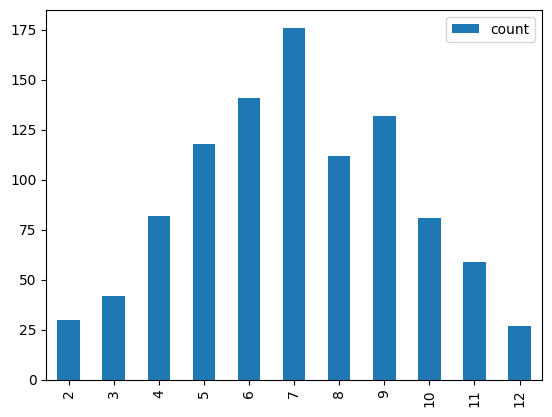

In [6]:
count_df.plot(kind="bar", y="count")
# this is the distribution of my experiment

In [7]:
def experiment(number_trials):
    experiment_1000trials = [random.randint(1,6) + random.randint(1,6) for trial in range(number_trials)]
    counting_result ={2:0, 3:0, 4:0, 5:0, 6:0 , 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
    for result in experiment_1000trials:
        counting_result[result] +=1 # counting_result[result] = counting_result[result] + 1
    count_df = pd.DataFrame(pd.Series(counting_result), columns=["count"])
    return count_df.plot(kind="bar", y="count")


<Axes: >

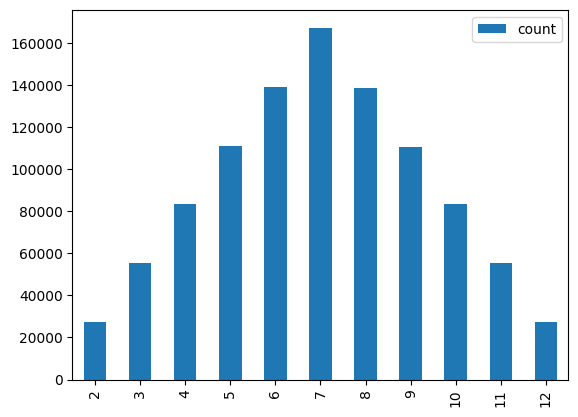

In [8]:
experiment(1000000)

In [9]:
count_df["frequency"] = count_df["count"]/count_df["count"].sum()
count_df["frequency"].sum()

count_df["cum_frequency"] = count_df["frequency"].cumsum()
count_df

,count,frequency,cum_frequency
2,30,0.030,0.030
3,42,0.042,0.072
4,82,0.082,0.154
5,118,0.118,0.272
6,141,0.141,0.413
7,176,0.176,0.589
8,112,0.112,0.701
9,132,0.132,0.833
10,81,0.081,0.914
11,59,0.059,0.973


<Axes: >

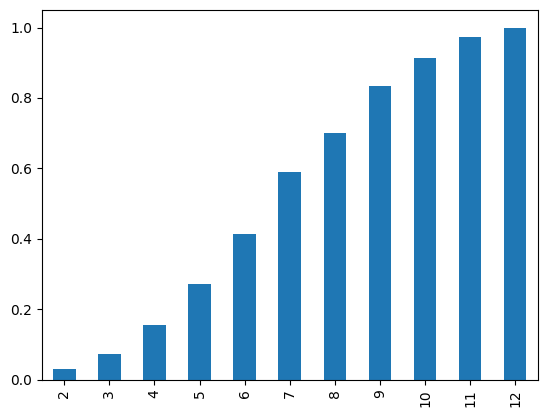

In [10]:
count_df["cum_frequency"].plot(kind="bar", y= "cum_frequency")

In [11]:
## example:

## a plane with 240 seats. Each individual passenger has a 3% chance of missing the flight.
## airplanes sell more tickets than the seats that are available. this is called overbooking.
## if the company routinely sells 245 tickets, what is the chance that they have a seat for every passenger?


## P(X <= 240)
## X: number of tickets / number people seated (in theory) in the plane
## Binomial(n,p): n=245, p=0.97 = 1-0.03 (prob sucess)

binomial_distribution = binom(245, 0.97)
binomial_distribution.cdf(240) ## P(X <=240)

np.float64(0.8605744116808268)

# Confidence Intervals 

As you are learning statistics, you start to realise that just because you had calculate one metric does not mean it is statistically significant. For example, you calculated the average revenue of a sample of users on a platform. Do you think this average represents the actual average of your whole user's database? Maybe yes, maybe not 🤷‍♀️

What if there was a way to actual tell for sure? Well this can be done using **confidence intervals**. 

## What you're going to learn in this class 🧐🧐

- What is a confidence interval
- How to build them
- Understand the difference between precision and accuracy
- Create a confidence interval for a mean and for a proportion
- Calculate the minimum sample size based on your population parameters

## Why do we need a confidence interval? 

One of the most common problems encountered when conducting an experiment is knowing when **enough data has been collected to make an informed decision**. Although time constraints always come into play, it is vital to understand the consequences of making decisions with a low confidence level. The concept of **statistical significance** is a widely used tool among statisticians to address this very problem.

Whenever we have a sample and calculate statistics, they can be used as a parameter for our population. For example, if you collect data on the age and gender of 100 randomly selected employees at Google, you will have a good idea of the age and gender of the entire population of Google employees. However, these results are inherently imperfect because the population is never perfectly represented. It is to quantify this inaccuracy that the concept of confidence intervals was created.

After today's lesson, you will be able to present results in a format that will allow your colleagues to see exactly how accurate your measurements are. Let's look at an example:

We can say with 95% certainty that:

1. Between 40% and 80% of Google's employees are men
2. The average age of employees is between 20 and 40 years old.

(NB: This data is completely made-up and does not represent the real Google population 😘)

## What's a confidence interval ✨

In the example above, the 95% confidence level means that each time you take a new sample of individuals, there will be a 95% chance that their age is within the defined interval (between 20 and 40 years old). In fact, you also have a 5% chance that the age is outside this interval.

So why not try to have a confidence interval of 99% or even 99.99%? Well, because the higher your confidence level, the wider your interval will be. To continue with the example above. You are 95% certain that the average age is between 20 and 40 years old, you will be as 99% certain that the average age is between 10 and 60 years old. You will have understood it, the whole in statistics is to arbitrate and balance the confidence rate and the confidence interval according to your constraints.

### How to choose the right confidence interval

The desired confidence level (or confidence rating) will depend on **the industry in which you work**. For example, for marketing decisions, a confidence level of 80% is more than sufficient. On the other hand, for the pharmaceutical industry, your confidence level will be higher at 95 or even 99%.

## Central Limit Theorem

### Definition

The Central Limit Theorem makes all these statistical calculations possible. This theorem states that the larger the samples, the closer the average of all these samples will be to the population average. Moreover, the more samples there are, the closer they will get to a normal distribution **no matter what distribution the sample followed initially**. 

Since we are dealing with averages when building confidence intervals, this theorem is extremely useful since we can take **any samples** of **any population**, calculate means of each of these samples and **these means will follow a normal distribution**. 

### Sample size

As you add more sample means to your dataset, your distribution will converge toward to Normal Distribution:

<img src="https://essentials-assets.s3.eu-west-3.amazonaws.com/M03-Python_programming_and_statistics/D02-A_B_testing_and_web_analytics/TCL_animated_V2.gif"/>

In terms of sample size, the Central Limit Theorem is considered to take effect from a sample of 30-40 individuals. (In our above example, we took random sample of size 100)

Thus, this theorem allows us to approximate that any sample of more than 30-40 individuals follows a normal distribution.

# How to calculate your confidence interval?

Now that you've seen the fundamental theory behind confidence interval, how do we calculate them? Here are the steps you will need to follow. 

1. Calculate Mean or proportion of your sample 
2. Determine a confidence level $\alpha$
3. Calculate Margin of Error $E$ 
4. Build confidence interval 

For step `1.` you already know how to calculate a mean or a proportion using `pandas` librairie in Python. Let's cover the next steps. 

## Confidence Level 

Your confidence level \$alpha$ is simply the threshold which you consider high enough to accept your confidence interval. 

Let's take a simple example: 

> * Let's say you want to know the average spendings in a grocery store. Based on a sample of spendings, you want to know the actual average spendings of the whole population. Therefore you would build a confidence interval. 

> * You want to be 95% sure that your actual mean will lie within your confidence interval. 

> * This means you want to set an $\alpha = 0.95$ 


The higher $\alpha$ the wider your confidence interval (refer to our example in the *What's a confidence interval?* section if you want to understand the idea why).

## Margin of Error

Now how would you calculate your confidence interval? 

One can use the standard deviation of the sample to determine the **margin of error (E)**. This margin of error can be estimated by dividing the standard deviation of your sample by the square root of its size:

$$
E = t \frac{s}{\sqrt{n}}
$$

$E$ represents the error we are _probably_ making by estimating the average of a measurement on a sample instead of studying the whole population. In other words, if we repeated the study once again on a different sample, we would probably get a mean value that is distant by $E$ from the previous study.

**The margin of error is always associated with a given confidence level.** : "I measured an average value $\overline{X}$ on my sample, and I'm 90% sure that the real average lies between $\overline{X} - E$ and $\overline{X} + E$". The interval $[\overline{X} - E, \overline{X} + E]$ is called the _confidence interval_.

### Determining the t-value (or z-value)

The t-value is determined from statistical distributions, depending on the confidence level that has been chosen for the study. You will never have to compute it by hand. To know which value to use, go to [http://statdistributions.com/t/](http://statdistributions.com/t/). Then follow the steps below :

- Choose a confidence level $\alpha$ (for example : 90%)
- If you're working with a small sample size (n < 30-40) you'll have to use _Student's distribution_ to determine the t-value. Set the p-value to $1 - \alpha$ (for example : 0.1) and the degrees of freedom $d.f. = n - 1$
- If you're working with a "big" sample size (n > 30-40), then you'll have to use the _Normal distribution_. In this case, the t-value is denoted as $z-value$ and it only depends on the p-value. Below are listed the usual z-values:

<center>
  <table style={{
  border: "1px solid black",
  textAlign: "center"
}}>
    <tr>
    <td><strong>Confidence Level</strong>
    </td>
    <td><strong>Z Critical Value</strong>
    </td>
    </tr>
    <tr>
    <td>80%
    </td>
    <td>1.28
    </td>
    </tr>
    <tr>
    <td>90%
    </td>
    <td>1.645
    </td>
    </tr>
    <tr>
    <td>95%
    </td>
    <td>1.96
    </td>
    </tr>
    <tr>
    <td>98%
    </td>
    <td>2.33
    </td>
    </tr>
    <tr>
    <td>99%
    </td>
    <td>2.58
    </td>
    </tr>
    <tr>
    <td>99.8%
    </td>
    <td>3.09
    </td>
    </tr>
    <tr>
    <td>99.9%
    </td>
    <td>3.29
    </td>
    </tr>
  </table>
</center>


### Using the margin of error to compute the minimal sample size

One can compute the minimal sample size $n$ that is needed to get a margin of error that is below a certain value :

$$
n = (\frac{t \times s}{E})^2
$$

## Confidence interval for proportions

If you're working with ratios instead of average values, it's also possible to determine the confidence interval. The steps are the same as before, only the formula of the margin of error is different :

$$
E = t \sqrt{\frac{p(1-p)}{n}}
$$

Then, the formula to compute the minimal sample size is:

$$
n = p(1-p)(\frac{t}{E})^2
$$

## Resources 📚📚

- Normal Law - [https://bit.ly/2JLmjov](https://bit.ly/2JLmjov)
- Student's Law - [https://bit.ly/2rgyfqu](https://bit.ly/2rgyfqu)
- Stat Distribution - [http://bit.ly/2y00EnU](http://bit.ly/2y00EnU)
- Accuracy VS Precision - [http://bit.ly/2lid4TS](http://bit.ly/2lid4TS)
- Central Limit Theorem - [http://bit.ly/2ld2hbx](http://bit.ly/2ld2hbx)

# Build confidence intervals

We will use Python for all the exercises. Let's find the confidence interval:

* Facebook would like to know the average time spent on their site. To do so, they launched a study on 100 people and asked them how much time they spend on Facebook per day:
    1. Open the `Hours spent on Facebook.xlsx` file. 
    2. Calculate the mean and standard deviation of the dataset.
    3. We would like to know the mean of the total population. Calculate the 95% confidence interval.
<br/>

* Google would like to know the mean monthly revenue generated per client on their Adwords platform. Due to lack of time, they have launched a questionnaire on only 30 people.  
    1. Open the `monthly_spending_adwords.xlsx` file.
    2. Calculate the mean and standard deviation of the dataset.
    3. We would like to know the mean of the total population. Calculate the 95% confidence interval.  
<br/>

* Nintendo is building their new console. However, the last console they launched was a disaster because no one bought it. This time, Nintendo would like to know how many cities they would have to survey to be 95% sure that they will build the right number of systems. The company will accept an error of 5000 consoles.  
    1. Open the `Number of switch sold.xlsx` file.
    2. Calculate the mean and standard deviation of the dataset.
    3. Set the margin of error to 5000.
    4. Find the minimum number of cities to study.  
<br/>

* Apple has just launched their new IOS for Iphone and would like to know if customers are satisfied with this version or not. They asked 40 people about their satisfaction with the OS and collected their answers. For educational purposes, we have marked the satisfied with a `1` and the dissatisfied with a `0`.
    1. Open the `satisfaction apple release.xlsx` file.
    2. Set the number n of people in the sample.
    3. Calculate $k$, the number of people satisfied with the OS.
    4. Calculate $p$, the proportion of people satisfied with the OS.
    5. Calculate the confidence interval of the proportion of the population.
<br/>

* A laboratory has created a new drug and would like to test its effectiveness. Based on tests done on rats, experts estimate that it should have an efficiency rate of about 90%. They would like to know the number of individuals that would have to be tested to confirm its 95% effectiveness with a Error margin $E$ of 1%.
    1. Set $p$, the estimated proportion.
    2. Set $z$, the $z-value$ for a 95% confidence level.
    3. Set your margin of Error, $E$.
    4. Calculate $n$.

In [ ]:
## Exercise number 1: FACEBOOK

df = pd.read_excel("datasets/Hours spent on Facebook.xlsx")
df
df.describe(include="all")
## Thm: sqrt(n)*(TRUE MEAN - mean_dataset(X))/(std(X)) sim t_{alpha_level, df}

## TRUE MEAN approximated by mean_dataset(X) + t_ * s/(sqrt(n))
## CI =(mean - error, mean + error)

## mean = df.feature.mean()

## error = t * s/(sqrt(n))

n = len(df)
mean = df["Hours spent on Facebook on Mobile"].mean()
t =stats.t.ppf(0.975, df= len(df)-1) ## 97,5% because the Gaussian is symmetric 
## there is 2,5% on left side and 2,5% right side (pls check the picture of Normal distribution)
s = df["Hours spent on Facebook on Mobile"].std()

error = s/m.sqrt(n) * t
confidence_interval = [mean - error, mean + error]

In [ ]:
## apple exercise
df = pd.read_excel("datasets/satisfaction apple release.xlsx")
df
df.columns
# $$
# E = t \sqrt{\frac{p(1-p)}{n}}
# $$
# number of people in the study
n = len(df)
#number satisfied people
k = df["Satisfied customer"].sum()
# let us do a CI with 95% confidence
t = stats.t.ppf(0.975, n-1)
# error
# proportion of people that are satisfied
p = k/n

error = t * m.sqrt(p * (1-p)/n) 

CI = [p - error, p + error]
print(CI)
def confidence_interval_proportion(confidence_level):
    n = len(df)
    p = df["Satisfied customer"].sum()/n
    t = stats.t.ppf(confidence_level + (1- confidence_level)/2, n-1)
    error = t * m.sqrt(p * (1-p)/n) 
    CI = [p - error, p + error]
    return CI

## EXPLANATION OF confidence level on the function
# 97,5 = 95 + (1-95)/2

#confidence_level + (1- confidence_level)/2
confidence_interval_proportion(0.95)
confidence_interval_proportion(0.9)
confidence_interval_proportion(0.8)
confidence_interval_proportion(0.5)
confidence_interval_proportion(0.99)